In [1]:
%matplotlib inline

import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images

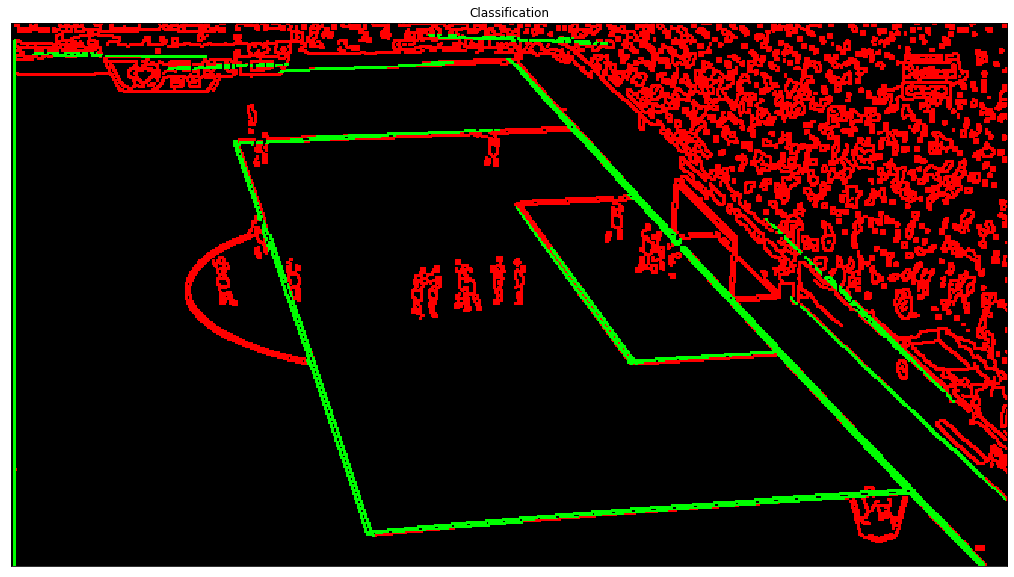

In [2]:
# for soccer classification

img_link = 'images/soccer/soccer_00020.png'
img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

iGausKernelSize = 7
imgFilt = cv2.GaussianBlur(img, (iGausKernelSize, iGausKernelSize), 0)
_, imgThres = cv2.threshold(imgFilt, 0, 255, cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgThres[iStart::iReducFactor, iStart::iReducFactor]

med = np.median( imgReduc)
    
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)
edges = cv2.dilate(edges, np.ones((2,2), dtype=np.uint8))

Max_gap = 2
Min_length = 75
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),Min_length,Max_gap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)
height, width = img.shape[:2]
mat = np.zeros((height,width))

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),Min_length,Max_gap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(mat,(2*x1,2*y1),(2*x2,2*y2),(255,255,255),3) 

iReducFactor = 2
iStart = iReducFactor // 2
blackReduc = mat[iStart::iReducFactor, iStart::iReducFactor]
blackReduc = blackReduc.astype('uint8')

img_and = cv2.bitwise_and(blackReduc, edges)

dilated = cv2.dilate(img_and, np.ones((1,1), dtype=np.uint8))
colored = np.zeros((dilated.shape[0], dilated.shape[1], 3), dtype='uint8')

colored[:,:,0] = edges
colored[:,:,0] -= dilated
colored[:,:,1] = dilated

tools.multiPlot(1, 1, (colored,), ('Classification',), cmap_tuple=(cm.gray,))